In [ ]:
# 3. Anatomía de una NN
# AirBnB ejemplo de regression prediccion de precios de los arriendos.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("airbnb.csv")
#df.head()


In [ ]:
df.shape

(74111, 29)

In [ ]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [ ]:
# botar columnas que no utilizaremos

df.drop(['id', 'amenities', 'name', 'description', 'number_of_reviews', 'thumbnail_url', 'neighbourhood',
         'zipcode', 'last_review', 'latitude', 'longitude', 'first_review', 'host_since', 'host_response_rate'], axis=1, inplace=True)
df.head()



,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,instant_bookable,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,f,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,t,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,t,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,f,NaN,2.0,2.0
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,t,40.0,0.0,1.0


In [ ]:
# reviso si hay algun valor perdido en alguna de las solumnas.
df.isna().sum()

log_price                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic        188
host_identity_verified      188
instant_bookable              0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

In [ ]:
#Removing null values that would not help the modelling
df = df[df.bathrooms.notna()]
df = df[df.host_has_profile_pic.notna()]
df = df[df.host_identity_verified.notna()]
#df = df[df.host_response_rate.notna()]
df = df[df.review_scores_rating.notna()]
df = df[df.bedrooms.notna()]
df = df[df.beds.notna()]
df.isna().sum()

log_price                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
instant_bookable          0
review_scores_rating      0
bedrooms                  0
beds                      0
dtype: int64

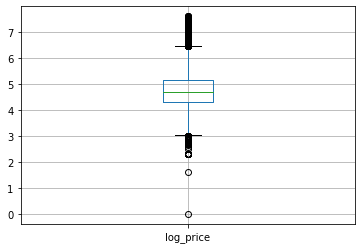

In [ ]:
df.boxplot(column='log_price', return_type='axes')

In [ ]:
# las instancias que estén a mas  de 3 sd o menos de 3 sd, las saco.

from numpy import mean
from numpy import std
def remove_outliers(x):
    data_mean = mean(x)
    data_std = std(x)
    cutoff = data_std*3
    lower = data_mean - cutoff
    upper = data_mean + cutoff
    return lower, upper
lower, upper = remove_outliers(df.log_price)
df_new = df.loc[(df.log_price > lower) & (df.log_price < upper)]
df_new.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,instant_bookable,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,f,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,t,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,t,92.0,1.0,3.0
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,t,40.0,0.0,1.0
5,4.442651,Apartment,Private room,2,1.0,Real Bed,strict,True,SF,t,t,t,100.0,1.0,1.0


In [ ]:
df.shape

(56989, 15)

In [ ]:
# podriamos gardar esta nueva version de la dataset que es mas pequeña
#type(df)

df.to_csv('airbnb_short.csv', index=False)

# ahora en adelante podemos partir trabajando de aqui:
#########################################

#########################################

#########################################

In [10]:
# Partimos de aqui, con nuestra bbdd depurada y mas corta:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# carga de datos
# vamos a importar los datos directamente desde github:
url = 'https://raw.githubusercontent.com/MAValle/deepLearning_intro_course/main/airbnb_short.csv'
df = pd.read_csv(url)
df.head()
# print(df.shape[1]) # 15 columnas



,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,instant_bookable,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,f,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,t,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,t,92.0,1.0,3.0
3,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,t,40.0,0.0,1.0
4,4.442651,Apartment,Private room,2,1.0,Real Bed,strict,True,SF,t,t,t,100.0,1.0,1.0


In [2]:
# lo nuevo:
# antes de hacer set train y test, primero hago la codificacion

df.columns




Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

In [3]:
# veamos algunas variables categoricas que debemos codificar:

print(df['cleaning_fee'].value_counts())
print(df['host_has_profile_pic'].value_counts())
print(df['host_identity_verified'].value_counts())
print(df['instant_bookable'].value_counts())

True     45304
False    11685
Name: cleaning_fee, dtype: int64
t    56896
f       93
Name: host_has_profile_pic, dtype: int64
t    41541
f    15448
Name: host_identity_verified, dtype: int64
f    41682
t    15307
Name: instant_bookable, dtype: int64


In [11]:
# voy a importar codificadores para convertir las variables BINARIAS a label encoding.

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Binary variables
le = LabelEncoder()
binary_var = ['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
for i in binary_var:
    le.fit(df[i])
    df[i] = le.transform(df[i])

# ejemplo
print(df['cleaning_fee'].value_counts())




1    45304
0    11685
Name: cleaning_fee, dtype: int64


In [6]:
# veamos algunas variables CATEGORICAS que debemos codificar a one-hot econding:

print(df['property_type'].value_counts())
print(df['room_type'].value_counts())
print(df['bed_type'].value_counts())
print(df['cancellation_policy'].value_counts())
print(df['city'].value_counts())


Apartment             37445
House                 12982
Condominium            1995
Townhouse              1286
Loft                   1009
Other                   418
Guesthouse              409
Bed & Breakfast         352
Bungalow                307
Villa                   127
Dorm                    105
Guest suite              99
Camper/RV                66
Cabin                    63
In-law                   63
Hostel                   55
Boutique hotel           47
Boat                     46
Timeshare                32
Serviced apartment       15
Tent                     14
Castle                   13
Hut                       7
Treehouse                 6
Vacation home             6
Yurt                      6
Chalet                    5
Tipi                      3
Earth House               3
Train                     2
Cave                      2
Island                    1
Name: property_type, dtype: int64
Entire home/apt    32836
Private room       22721
Shared room         

In [12]:
#Multi-category variables

oe = OneHotEncoder(sparse=False, handle_unknown = 'error')
oe.fit(df[['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']])

#  transformamos las variables.
multi = oe.transform(df[['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']])
#df_multi = pd.DataFrame(index = df.index, data=multi, columns=oe.get_feature_names(['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']))
df_multi = pd.DataFrame(index = df.index, data=multi, columns=oe.get_feature_names_out(['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']))


df = pd.concat([df, df_multi], axis=1)
df.drop(columns=['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city'], inplace=True)

print(df.columns)
print(df.shape)

Index(['log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'review_scores_rating', 'bedrooms', 'beds', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Castle', 'property_type_Cave', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Earth House', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Hut', 'property_type_In-law',
       'property_type_Island', 'property_type_Loft', 'property_type_Other',
       'property_type_Serviced apartment', 'property_type_Tent',
       'property_type_Timeshare', 'property_type_Tipi',
       'property_type_Townhouse', 'property_type_Train',
       '

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
# pasamos de 15 columnas a 61. ¿por qué?

In [14]:
# ahora hacemos particion de muestra en train y test

from sklearn.model_selection import train_test_split
x = df.iloc[:, 1:61]
y = df.iloc[:, 0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


In [15]:
print(x.columns)
print(y)

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'host_has_profile_pic',
       'host_identity_verified', 'instant_bookable', 'review_scores_rating',
       'bedrooms', 'beds', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Castle', 'property_type_Cave', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Earth House', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Hut', 'property_type_In-law',
       'property_type_Island', 'property_type_Loft', 'property_type_Other',
       'property_type_Serviced apartment', 'property_type_Tent',
       'property_type_Timeshare', 'property_type_Tipi',
       'property_type_Townhouse', 'property_type_Train',
       'property_type

In [16]:
#x_train.head()

#print(dict(x_train.dtypes) )
x_train.info()
#x_test.info()

# vemos que host_response_rate  nos molesta.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 39892 entries, 26377 to 56422
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   accommodates                         39892 non-null  int64  
 1   bathrooms                            39892 non-null  float64
 2   cleaning_fee                         39892 non-null  int64  
 3   host_has_profile_pic                 39892 non-null  int64  
 4   host_identity_verified               39892 non-null  int64  
 5   instant_bookable                     39892 non-null  int64  
 6   review_scores_rating                 39892 non-null  float64
 7   bedrooms                             39892 non-null  float64
 8   beds                                 39892 non-null  float64
 9   property_type_Apartment              39892 non-null  float64
 10  property_type_Bed & Breakfast        39892 non-null  float64
 11  property_type_Boat      

In [17]:
# ahora escalamos los datos para asegurar que esten todos en la misma escala.
# Para est utilizamos MinMaxScaler que estandariza datos en el rango de 0 a 1.

from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
x_train_scaled = pd.DataFrame(mn.fit_transform(x_train), columns = x_train.columns)
x_test_scaled = pd.DataFrame(mn.fit_transform(x_test), columns = x_test.columns)

x_train_scaled.head()

,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,review_scores_rating,bedrooms,beds,property_type_Apartment,...,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,0.133333,0.125,1.0,1.0,1.0,1.0,0.8625,0.1,0.055556,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.066667,0.125,1.0,1.0,0.0,0.0,1.0000,0.1,0.055556,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.066667,0.125,1.0,1.0,1.0,1.0,1.0000,0.1,0.055556,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.200000,0.125,1.0,1.0,1.0,0.0,0.9500,0.1,0.111111,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.125,1.0,1.0,1.0,0.0,0.9750,0.1,0.055556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
# ahora podemos pasar a la RED NEURONAL MAS ABAJO.
x_train_scaled.shape[1] # tenemos 60 predictores.

60

In [ ]:
###################################################
###################################################
###################################################

In [ ]:
###################################################
###################################################
###################################################

In [19]:
# NN

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.callbacks import EarlyStopping

#Step1. definir modelo
model = Sequential()
model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (x_train_scaled.shape[1],)))
model.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(1))





In [20]:

#Step2. compilar modelo
# https://keras.io/api/metrics/
#from tensorflow.python.keras.metrics import Metric

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

#Step3. Fiteo del modelo (lo hago con solo 2 epochs para fines demostrativos)
history = model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=2, batch_size=64, verbose=0)


535/535 [==============================] - 1s 2ms/step - loss: 0.1793 - mae: 0.3269


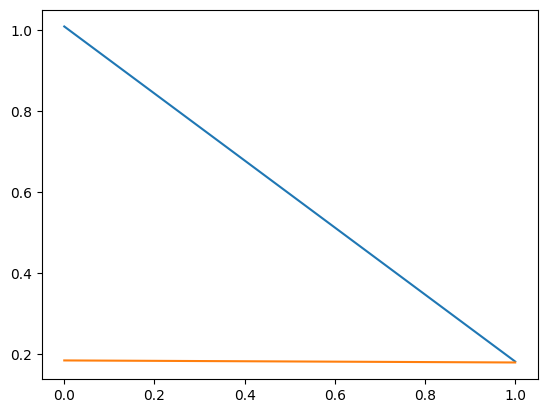

In [21]:

#Step4.1 evaluacion del modelo
loss, mae = model.evaluate(x_test_scaled, y_test)
#Step4.2 Ploto de  learning curve
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()

In [ ]:
##########


In [ ]:
# Ejercicio: incremente la complejidad de la red, incorporando nuevas capas, y veamos si el MAE disminuye
# considere:


model4 = Sequential()
model4.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (x_train_scaled.shape[1],)))
model4.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model4.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model4.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model4.add(Dense(1))
#Step2 - sigua Ud adelante  (tarea)

